In [6]:
import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import quandl
from matplotlib import style
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression



In [7]:

style.use('ggplot')


df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume', ]]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0

df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0


df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'

df.fillna(-99999, inplace=True)


In [8]:
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)


35


In [9]:
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))

X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)

y = np.array(df['label'])



In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)


clf = LinearRegression()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)



[1099.7120261  1069.61720203 1014.26497749 1056.44042272 1071.58744597
 1072.59710944 1090.56533117 1108.73623199 1113.79566957 1121.3914691
 1130.94290124 1127.48727693 1146.81708369 1163.27018546 1133.2787531
 1120.17615938 1083.84269911 1101.01868714 1112.52538926 1119.96376578
 1133.57080897 1148.92031341 1179.51364536 1184.4819256  1153.82046558
 1167.60680404 1168.28453182 1150.68861755 1115.40051828 1112.84953467
 1111.6777103  1066.90760059 1039.44530043 1067.57586231 1014.41902559] 0.9785103272493162 35


In [11]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day_in_secs = 86400
next_unix = last_unix + one_day_in_secs

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day_in_secs
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

print(df.tail())



                     Adj. Close  HL_PCT  PCT_change  Adj. Volume  label  \
Date                                                                      
2018-03-08 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-09 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-10 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-11 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-12 05:30:00         NaN     NaN         NaN          NaN    NaN   

                        Forecast  
Date                              
2018-03-08 05:30:00  1111.677710  
2018-03-09 05:30:00  1066.907601  
2018-03-10 05:30:00  1039.445300  
2018-03-11 05:30:00  1067.575862  
2018-03-12 05:30:00  1014.419026  


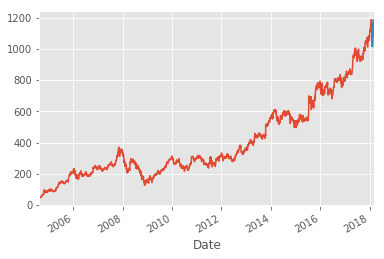

In [12]:

df['Adj. Close'].plot()
df['Forecast'].plot()


No handles with labels found to put in legend.


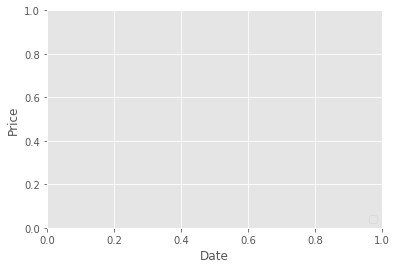

In [13]:
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
